In [1]:
pip install yfinance matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
ticker = "TSLA"
start_date = "2022-10-01"
end_date = "2023-10-02"

data = yf.download(ticker,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


In [54]:
data['Daily_Return'] = data['Adj Close'].pct_change()

In [11]:
pip install pandas_market_calendars

  Obtaining dependency information for pandas_market_calendars from https://files.pythonhosted.org/packages/c1/bd/f5328c24534d55c2a729d214bdb05d82b0b25e415fd0e0138a49175913bf/pandas_market_calendars-4.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for exchange-calendars>=3.3 from https://files.pythonhosted.org/packages/79/a8/d7e75932a97e253dd300bb94533af230788f71443353c48c85032f256870/exchange_calendars-4.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas_market_calendars as mcal

In [13]:
nyse_cal = mcal.get_calendar('NYSE')

In [15]:
trading_sessions = nyse_cal.schedule(start_date=start_date,end_date=end_date)

In [16]:
num_trading_days = len(trading_sessions)

In [36]:
print(f"Number of trading days between {start_date} and {end_date}:{num_trading_days}") 

Number of trading days between 2022-10-01 and 2023-10-2:250


In [21]:
trading_days = 250

annualised_return = ((1+data['Daily_Return'].mean())**trading_days) - 1
annualised_volatility = data['Daily_Return'].std()*np.sqrt(trading_days)

In [39]:
print(f"Annualised Return: {annualised_return:.2%}")


Annualised Return: 23.60%


In [41]:
print (f"annualised volatility: {annualised_volatility:.2%}")

annualised volatility: 60.06%


# # plot daily returns

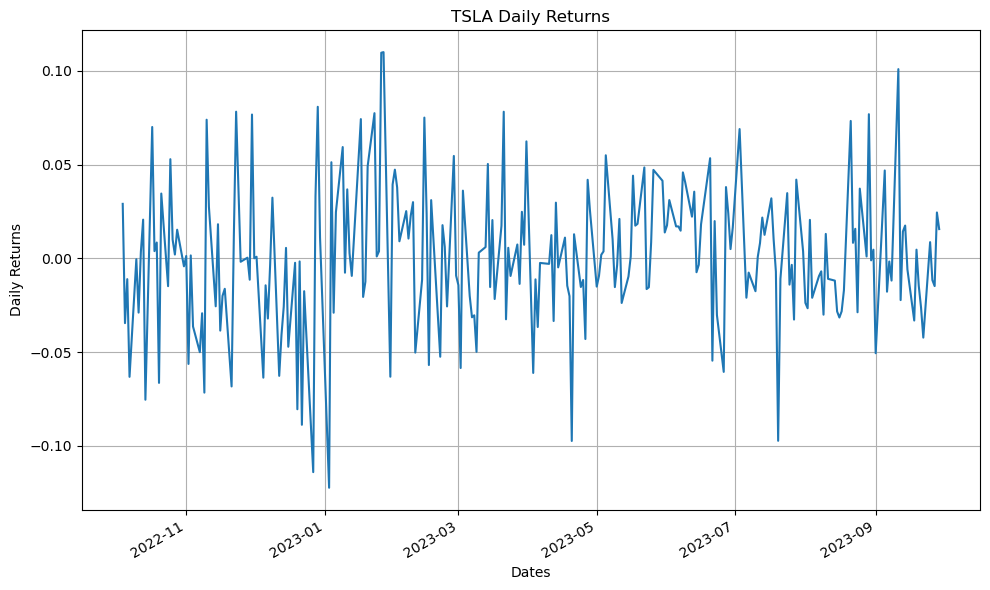

In [31]:
plt.figure(figsize=(10, 6))
data['Daily_Return'].plot(title='TSLA Daily Returns')
plt.xlabel('Dates')
plt.ylabel('Daily Returns')
plt.tight_layout()
plt.grid(True)
plt.show()

In [46]:
data = data.dropna()

In [56]:
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  254.500000  255.160004  241.009995  242.399994  242.399994   
2022-10-04  250.520004  257.500000  242.009995  249.440002  249.440002   
2022-10-05  245.009995  246.669998  233.270004  240.809998  240.809998   
2022-10-06  239.440002  244.580002  235.350006  238.130005  238.130005   
2022-10-07  233.940002  234.570007  222.020004  223.070007  223.070007   

               Volume  Daily_Return  
Date                                 
2022-10-03   98363500           NaN  
2022-10-04  109578500      0.029043  
2022-10-05   86982700     -0.034598  
2022-10-06   69298400     -0.011129  
2022-10-07   83916800     -0.063243  


In [57]:
print(data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return'], dtype='object')


In [65]:
print (data)

                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2022-10-03  254.500000  255.160004  ...  242.399994   98363500
2022-10-04  250.520004  257.500000  ...  249.440002  109578500
...                ...         ...  ...         ...        ...
2023-09-28  240.020004  247.550003  ...  246.380005  117058900
2023-09-29  250.000000  254.770004  ...  250.220001  128346200

[250 rows x 6 columns]


In [69]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [70]:
print (data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  254.500000  255.160004  241.009995  242.399994  242.399994   
2022-10-04  250.520004  257.500000  242.009995  249.440002  249.440002   
2022-10-05  245.009995  246.669998  233.270004  240.809998  240.809998   
2022-10-06  239.440002  244.580002  235.350006  238.130005  238.130005   
2022-10-07  233.940002  234.570007  222.020004  223.070007  223.070007   
2022-10-10  223.929993  226.990005  218.360001  222.960007  222.960007   
2022-10-11  220.949997  225.750000  215.000000  216.500000  216.500000   
2022-10-12  215.330002  219.300003  211.509995  217.240005  217.240005   
2022-10-13  208.300003  222.990005  206.220001  221.720001  221.720001   
2022-10-14  224.009995  226.259995  204.160004  204.990005  204.990005   
2022-10-17  210.039993  221.860001  209.449997  219.350006  219.350006   
2022-10-18  229.500000  229.820007  21